In [1]:
import os
import sys

In [11]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.model import Modeling

# HomeCredit()

In [44]:
data_home = HomeCredit().get_data()['train']
data_home.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data_home.shape

(307511, 122)

In [39]:
data_home['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [40]:
max(data_home['OWN_CAR_AGE'])

nan

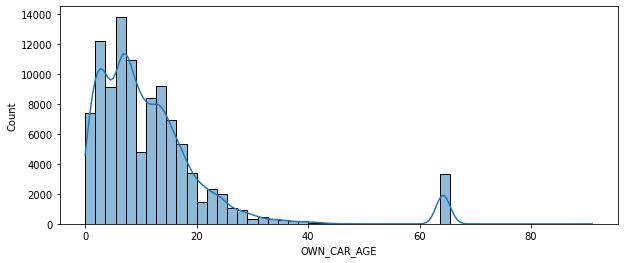

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 4))
sns.histplot(data_home['OWN_CAR_AGE'], kde=True, bins= 50);

In [47]:
data_home = data_home[data_home['CODE_GENDER'] != 'XNA'] # with gender = XNA
data_home = data_home[data_home['NAME_FAMILY_STATUS'] != 'Unknown'] # 'Unknown' status
# Remove entries with DAYS_EMPLOYED > 200_000
data_home = data_home[data_home['DAYS_EMPLOYED'] < 200_000]
data_home = data_home[data_home['AMT_ANNUITY'] < 150_000]
data_home = data_home[data_home['AMT_GOODS_PRICE'] < 2.5* 10**6]  

data_home['FLAG_OWN_CAR'].value_counts()

Y    93501
Name: FLAG_OWN_CAR, dtype: int64

In [48]:
data_home = data_home[data_home['OWN_CAR_AGE'] < 80]
data_home['FLAG_OWN_CAR'].value_counts()

Y    93501
Name: FLAG_OWN_CAR, dtype: int64

# Preparation()

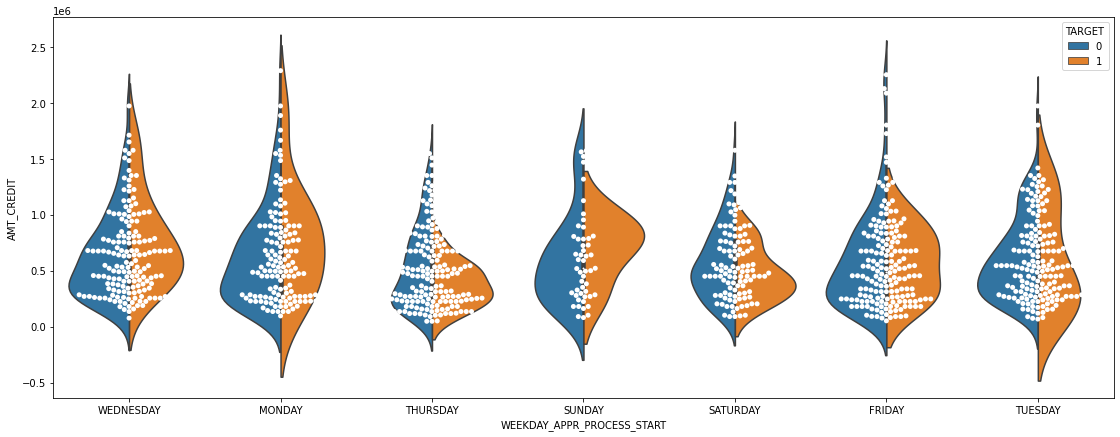

In [4]:
prep = Preparation()
prep.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START")

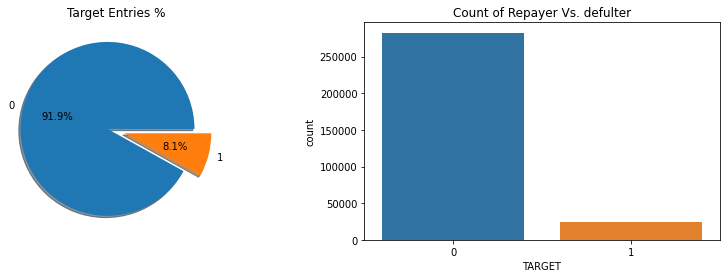

,TARGET
0,0.919271
1,0.080729


In [5]:
prep.targetVar()

# Cleaning()

In [3]:
cl = Cleaning()

In [4]:
cl.get_count_missvalues()

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Number of missing values,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
AMT_ANNUITY,12,0.00
CNT_FAM_MEMBERS,2,0.00


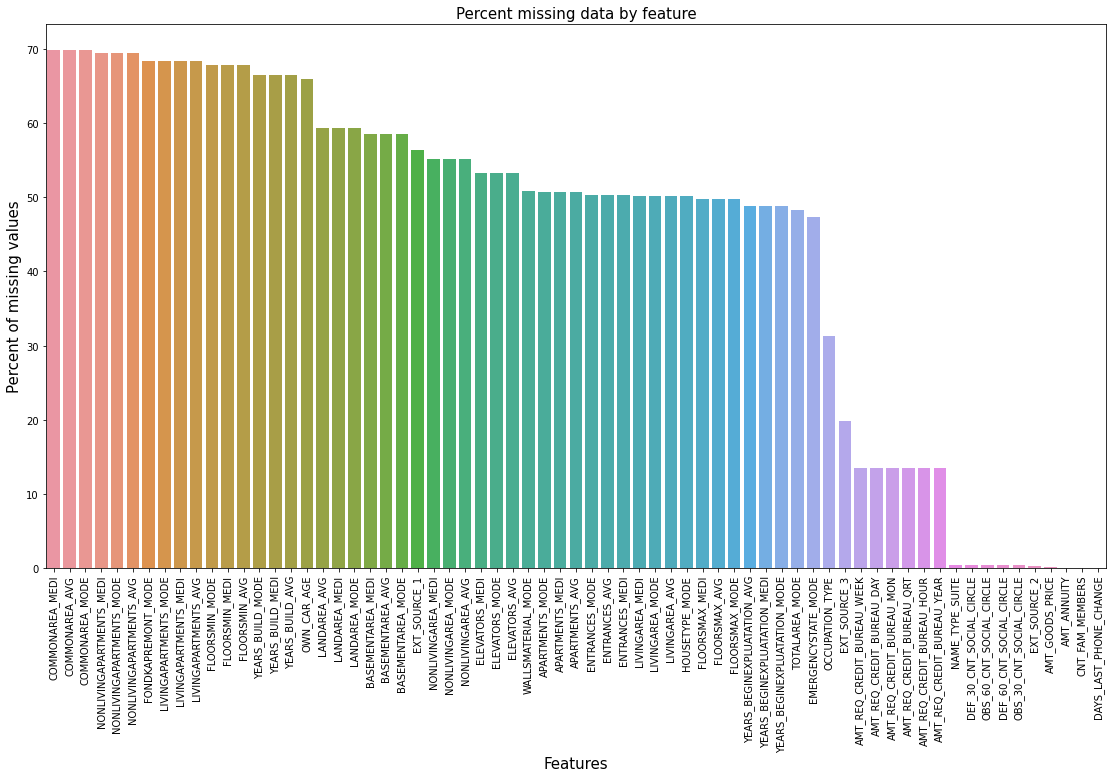

In [5]:
cl.plot_missvalues_table()

In [6]:
cl.remove_missvalues()

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006593,0.006988,0.034085,0.282136,0.259934,1.857016
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,0.006593,0.006988,0.034085,0.282136,0.259934,1.857016
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.006593,0.006988,0.034085,0.282136,0.259934,1.857016
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
cl.remove_missvalues().shape

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


(251754, 122)

# Exploration()

In [8]:
ex = Exploration()

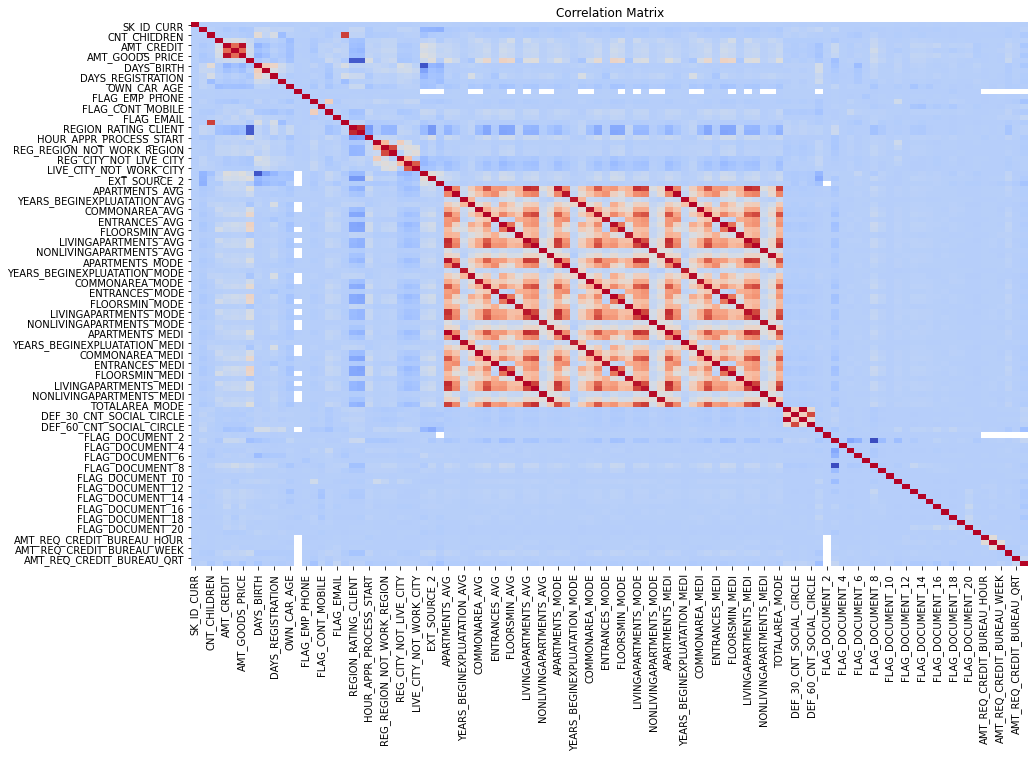

In [9]:
ex.plot_correlation()

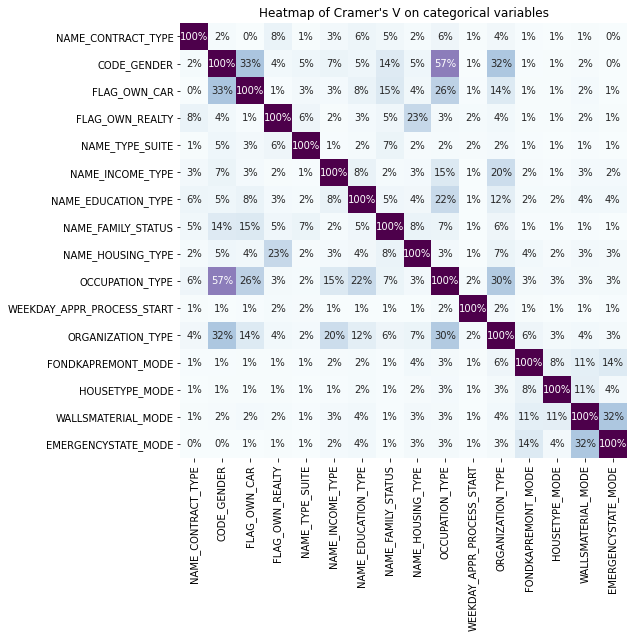

In [10]:
ex.plot_heatmapCramerV()

# Modeling()

In [12]:
ml = Modeling()

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
ml.data.shape

(251754, 248)

In [14]:
dic = ml.execute()

Model:  LR  scoring: roc_auc  score 0.7495231119568218
Model:  LR  scoring: accuracy  score 0.9128510386680724
Model:  KNN  scoring: roc_auc  score 0.5508851497727687
Model:  KNN  scoring: accuracy  score 0.9067850026106358
Model:  DTC  scoring: roc_auc  score 0.5401634830474753
Model:  DTC  scoring: accuracy  score 0.8438604875509006


In [15]:
dic['Results']

[['LR', 'roc_auc', 0.7495231119568218],
 ['LR', 'accuracy', 0.9128510386680724],
 ['KNN', 'roc_auc', 0.5508851497727687],
 ['KNN', 'accuracy', 0.9067850026106358],
 ['DTC', 'roc_auc', 0.5401634830474753],
 ['DTC', 'accuracy', 0.8438604875509006]]

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
ml.predict(best_model = LogisticRegression(max_iter=1000), best_scoring='accuracy')

score:  0.9132539280266287
Accuracy: 0.9132760469765779


0.9132760469765779